/var/folders/gx/1mr3nkhn62s1sxgdwspbnk4c0000gp/T/ipykernel_56846/601751231.py:26: RuntimeWarning: invalid value encountered in divide
  z = e * r0 * np.sin(np.arccos(x / (r0 * (1 - e**2))))
/var/folders/gx/1mr3nkhn62s1sxgdwspbnk4c0000gp/T/ipykernel_56846/601751231.py:26: RuntimeWarning: invalid value encountered in arccos
  z = e * r0 * np.sin(np.arccos(x / (r0 * (1 - e**2))))


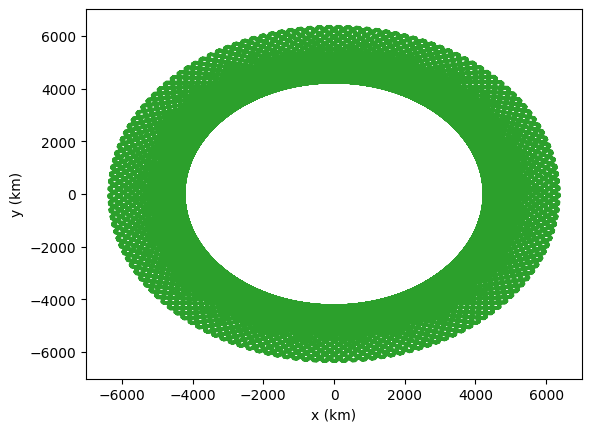

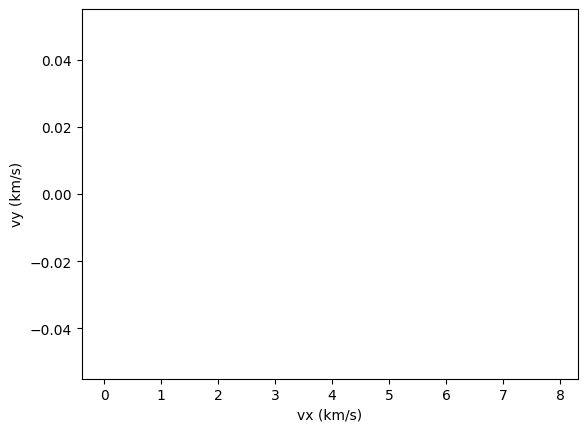

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 발사 초기 위치
r0 = np.array([0, 0, 6378.137])
v0 = np.array([7.91, 0, 0])

# 중력 상수
G = 6.67408e-11

# 궤도 이심률
e = 0.01

# 궤도 경사각
i = 0

# 궤도 주기
T = 2 * np.pi * np.sqrt((r0**3) / (G * (1 - e**2)))

# 시간
t = np.linspace(0, T, 1000)

# 궤도 위치
x = r0 * np.cos(t)
y = r0 * np.sin(t)
z = e * r0 * np.sin(np.arccos(x / (r0 * (1 - e**2))))

# 궤도 그리기
plt.plot(x, y)
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.show()

# 궤도 속도
vx = v0 * np.cos(i) * np.cos(t) - v0 * np.sin(i) * np.sin(t)
vy = v0 * np.sin(i) * np.cos(t) + v0 * np.cos(i) * np.sin(t)
vz = v0 * np.sqrt(1 - e**2) * np.sin(t)

# 궤도 속도 그리기
plt.plot(vx, vy)
plt.xlabel("vx (km/s)")
plt.ylabel("vy (km/s)")
plt.show()

In [5]:
import ephem

def calculate_satellite_position(satellite_name, observation_time):
    # 위성 정보를 가져오기
    satellite = ephem.readtle(satellite_name, "line1", "line2")

    # 관측자의 위치 설정 (예: 서울)
    observer = ephem.Observer()
    observer.lat = '37.5665'
    observer.lon = '126.9780'
    observer.elev = 0  # 해발고도 (미터)

    # 관측 시간 설정
    observer.date = observation_time

    # 위성의 위치 계산
    satellite.compute(observer)

    # 계산된 위성의 위치 정보
    latitude = satellite.sublat
    longitude = satellite.sublong
    altitude = satellite.elevation

    return latitude, longitude, altitude

# 예시: ISS (국제우주정거장)의 위치를 현재 시간에 계산
satellite_name = "ISS (ZARYA)"
observation_time = ephem.now()
latitude, longitude, altitude = calculate_satellite_position(satellite_name, observation_time)

print(f"위도: {latitude}, 경도: {longitude}, 고도: {altitude} km")


ValueError: line does not conform to tle format

In [7]:
import math
import datetime

def calculate_satellite_position(satellite_name, observation_time):
    # 상수 정의
    GM = 398600.44  # 중력 상수 (km^3/s^2)
    R_EARTH = 6371.0  # 지구 반지름 (km)

    # 위성의 궤도 요소 (임의의 값, 실제 값으로 대체해야 함)
    semi_major_axis = 8000.0  # 장반경 (km)
    eccentricity = 0.1
    inclination = math.radians(45.0)  # 경사각 (라디안)
    ascending_node = math.radians(30.0)  # 승교점 경도 (라디안)
    argument_of_perigee = math.radians(60.0)  # 위상점의 인수 (라디안)

    # 시간 변환
    t = observation_time.timestamp()

    # 평균 운동 상태 계산
    n = math.sqrt(GM / (semi_major_axis ** 3))
    mean_anomaly = n * t

    # 이행궤도 상태 계산
    ecc_anomaly = mean_anomaly
    for _ in range(10):  # 반복적인 방법으로 이심각각 계산
        ecc_anomaly = mean_anomaly + eccentricity * math.sin(ecc_anomaly)

    # 위성의 진근점 거리와 위상각 계산
    true_anomaly = 2 * math.atan2(math.sqrt(1 + eccentricity) * math.sin(ecc_anomaly / 2),
                                  math.sqrt(1 - eccentricity) * math.cos(ecc_anomaly / 2))
    radius = semi_major_axis * (1 - eccentricity ** 2) / (1 + eccentricity * math.cos(true_anomaly))

    # 위성의 지구 중심 좌표 계산
    x = radius * (math.cos(ascending_node) * math.cos(argument_of_perigee + true_anomaly) -
                  math.sin(ascending_node) * math.sin(argument_of_perigee + true_anomaly) * math.cos(inclination))
    y = radius * (math.sin(ascending_node) * math.cos(argument_of_perigee + true_anomaly) +
                  math.cos(ascending_node) * math.sin(argument_of_perigee + true_anomaly) * math.cos(inclination))
    z = radius * (math.sin(argument_of_perigee + true_anomaly) * math.sin(inclination))

    return x, y, z

# 예시: ISS (국제우주정거장)의 위치를 현재 시간에 계산
satellite_name = "ISS"
observation_time = datetime.datetime.utcnow()
x, y, z = calculate_satellite_position(satellite_name, observation_time)

print(f"X 좌표: {x} km")
print(f"Y 좌표: {y} km")
print(f"Z 좌표: {z} km")


X 좌표: -1142.3872810141806 km
Y 좌표: -6870.466923691464 km
Z 좌표: -5378.80525127044 km


In [8]:
# 예시: ISS (국제우주정거장)의 위치를 현재 시간에 계산
satellite_name = "ISS"
observation_time = datetime.datetime.utcnow()
x, y, z = calculate_satellite_position(satellite_name, observation_time)

print(f"X 좌표: {x} km")
print(f"Y 좌표: {y} km")
print(f"Z 좌표: {z} km")

X 좌표: -1020.1930976504526 km
Y 좌표: -6853.269244152768 km
Z 좌표: -5425.008715585648 km


In [9]:
# 예시: ISS (국제우주정거장)의 위치를 현재 시간에 계산
satellite_name = "ISS"
observation_time = datetime.datetime.utcnow()
x, y, z = calculate_satellite_position(satellite_name, observation_time)

print(f"X 좌표: {x} km")
print(f"Y 좌표: {y} km")
print(f"Z 좌표: {z} km")

X 좌표: -981.2892606024842 km
Y 좌표: -6847.4437045337345 km
Z 좌표: -5439.4155688087985 km


/var/folders/gx/1mr3nkhn62s1sxgdwspbnk4c0000gp/T/ipykernel_56846/2166619670.py:62: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
/var/folders/gx/1mr3nkhn62s1sxgdwspbnk4c0000gp/T/ipykernel_56846/2166619670.py:62: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
/var/folders/gx/1mr3nkhn62s1sxgdwspbnk4c0000gp/T/ipykernel_56846/2166619670.py:62: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  plt.tight_layout()
/var/folders/gx/1mr3nkhn62s1sxgdwspbnk4c0000gp/T/ipykernel_56846/2166619670.py:62: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
/var/folders/gx/1mr3nkhn62s1sxgdwspbnk4c0000gp/T/ipykernel_56846/2166619670.py:62: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  plt.tight_layout()
/var/folders/gx/1mr3nkhn62s1sxgdwspbnk4c0000gp/T/ipykernel_56846/2166619670.py:62: UserWarnin

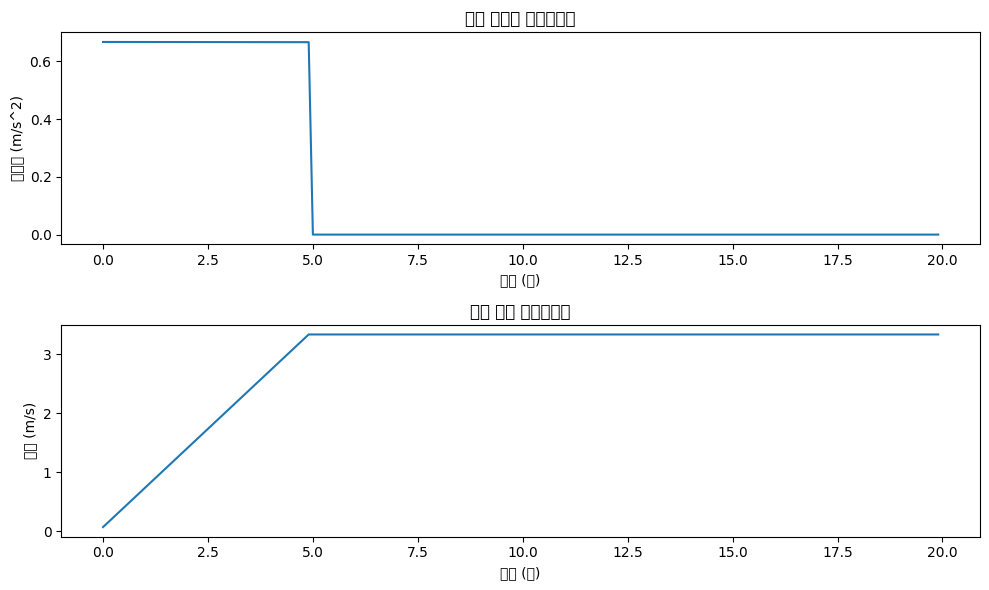

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def rocket_simulation(thrust_duration, total_duration, rocket_mass, fuel_mass, exhaust_velocity):
    # 초기 조건
    dt = 0.1  # 시간 간격
    num_steps = int(total_duration / dt)
    
    # 초기 속도 및 높이
    velocity = 0.0
    height = 0.0
    
    # 가속도 및 시간 배열 초기화
    accelerations = np.zeros(num_steps)
    times = np.arange(0, total_duration, dt)
    
    # 시뮬레이션 루프
    for i in range(num_steps):
        if times[i] < thrust_duration:
            # 로켓 추진력이 적용되는 동안
            thrust = (exhaust_velocity * fuel_mass) / (rocket_mass + fuel_mass)
            acceleration = thrust / (rocket_mass + fuel_mass)
            fuel_mass -= (thrust / exhaust_velocity) * dt
        else:
            # 로켓 추진력이 없는 동안
            acceleration = 0.0
        
        # 속도 및 높이 갱신
        velocity += acceleration * dt
        height += velocity * dt
        
        # 결과 저장
        accelerations[i] = acceleration
    
    return times, accelerations

# 시뮬레이션 파라미터 설정
thrust_duration = 5.0  # 추진력이 가해지는 시간 (초)
total_duration = 20.0  # 총 시뮬레이션 시간 (초)
rocket_mass = 1000.0  # 로켓 질량 (kg)
fuel_mass = 500.0  # 연료 질량 (kg)
exhaust_velocity = 3000.0  # 엔진 배기 속도 (m/s)

# 로켓 시뮬레이션 실행
times, accelerations = rocket_simulation(thrust_duration, total_duration, rocket_mass, fuel_mass, exhaust_velocity)

# 결과 플로팅
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(times, accelerations)
plt.title('로켓 가속도 시뮬레이션')
plt.xlabel('시간 (초)')
plt.ylabel('가속도 (m/s^2)')

plt.subplot(2, 1, 2)
plt.plot(times, np.cumsum(accelerations) * 0.1)
plt.title('로켓 속도 시뮬레이션')
plt.xlabel('시간 (초)')
plt.ylabel('속도 (m/s)')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def rocket_orbit_simulation(total_duration, rocket_mass, fuel_mass, exhaust_velocity):
    # 초기 조건
    dt = 0.1  # 시간 간격
    num_steps = int(total_duration / dt)
    
    # 초기 속도 및 위치
    velocity = np.array([0.0, 7.66e3])  # 초기 속도 (m/s), 지구 표면에서 원형 궤도 속도
    position = np.array([6.3781e6, 0.0])  # 초기 위치 (m), 지구 반지름 위에서 시작
    
    # 중력 가속도
    GM = 3.986e14  # 중력 상수 (m^3/s^2)
    
    # 가속도 및 시간 배열 초기화
    accelerations = np.zeros((num_steps, 2))
    times = np.arange(0, total_duration, dt)
    
    # 시뮬레이션 루프
    for i in range(num_steps):
        # 로켓 추진력
        thrust = (exhaust_velocity * fuel_mass) / (rocket_mass + fuel_mass)
        
        # 중력 가속도
        gravity = -GM / np.linalg.norm(position)**3 * position
        
        # 로켓 가속도
        acceleration = thrust / (rocket_mass + fuel_mass) + gravity
        
        # 속도 및 위치 갱신
        velocity += acceleration * dt
        position += velocity * dt
        
        # 결과 저장
        accelerations[i] = acceleration
    
    return times, accelerations

# 시뮬레이션 파라미터 설정
total_duration = 5000000000.0  # 총 시뮬레이션 시간 (초)
rocket_mass = 1000.0  # 로켓 질량 (kg)
fuel_mass = 500.0  # 연료 질량 (kg)
exhaust_velocity = 3000.0  # 엔진 배기 속도 (m/s)

# 로켓 시뮬레이션 실행
times, accelerations = rocket_orbit_simulation(total_duration, rocket_mass, fuel_mass, exhaust_velocity)

# 결과 플로팅
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(times, np.linalg.norm(accelerations, axis=1))
plt.title('로켓 가속도 크기 시뮬레이션')
plt.xlabel('시간 (초)')
plt.ylabel('가속도 크기 (m/s^2)')

plt.subplot(2, 1, 2)
plt.plot(times, np.linalg.norm(accelerations, axis=1) * times)
plt.title('로켓 속도 크기 시뮬레이션')
plt.xlabel('시간 (초)')
plt.ylabel('속도 크기 (m/s)')

plt.tight_layout()
plt.show()
